# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience </a>

In [3]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

## Задача 1
### Распределение Стьюдента


В `scipy.stats` распределение Стьюдента задается объектом `t` с параметрами:
 * `loc` и `scale` параметры распределения так же как и у нормального распределение
 * `df` число степеней свободы

Все остальные методы стандартные. Например, генерации выборки из распределения $T_{50}$ будет выглядеть так:


In [2]:
sps.t(df=50).rvs(4)

array([-0.86797009,  0.68780168,  0.56111649,  0.56269561])

Постройте на одном графике плотности распределения Стьюдента и нормального.


Text(0.5, 1.0, 'Плотность распределения Стьюдента и нормального распределения')

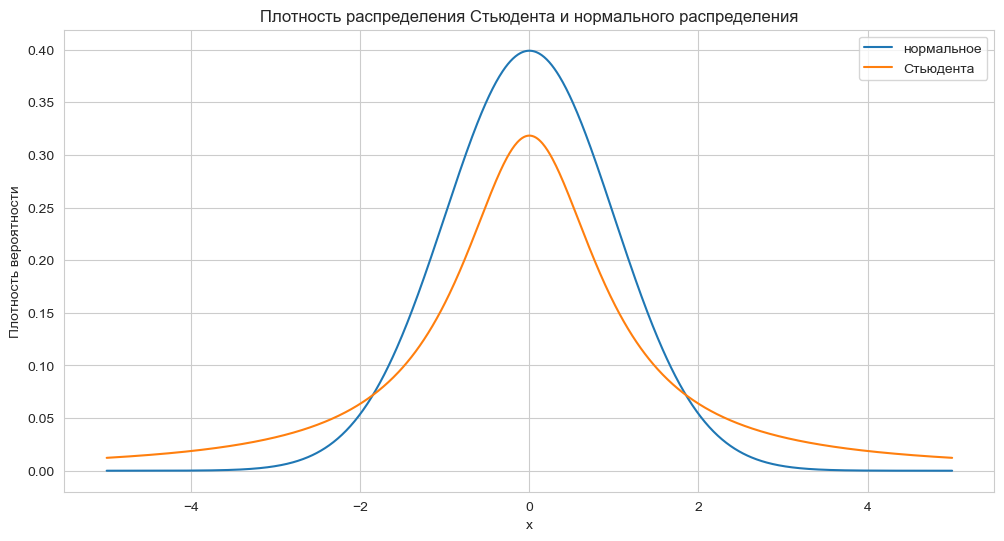

In [26]:
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(12, 6))
plt.plot(x, sps.norm.pdf(x), label='нормальное')
plt.plot(x, sps.t.pdf(x, df=1), label='Стьюдента')
plt.legend()
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.title('Плотность распределения Стьюдента и нормального распределения')


Что вы можете сказать о скорости убывания "хвостов" данных распределений? Повлияет ли это на значения соответствующих квантилей?

**Ответ:** Видно, что скорость убывания хвостов у нормального распределения ниже. Повлияет - для распределения Стьюдента больше значений будут дальше от медианы, чем для нормального распределения.

### Квантили распределения Стьюдента

Для подсчета теоретических значений квантилей в модуле `scipy.stats` есть метод `.ppf`. На вход принимает параметр `alpha` - значение квантиля, а так же все параметры выбранного распределения.



In [10]:
sps.norm(loc=0, scale=1).ppf(0.05)

-1.6448536269514729

Для распределения Стьюдента нужно указать еще число степеней свобод.

In [11]:
sps.t(loc=0, scale=1, df=5).ppf(0.05)

-2.0150483726691575

Как мы видим, значения квантилей довольно сильно различаются. 

Возьмите `alpha` равное 95% и постройте график значений квантилей распределения стьюдента $T_{n-1,(1+\alpha)/2}$ от его степеней свобод. Так же нанесите на график значение квантиля нормального распределения $z_{(1+\alpha)/2}$

*Указание*: рассмотрите значения степеней свобод от 1 до 50.

In [18]:
alpha = 0.95
deg = [sps.t(loc=0, scale=1, df=i).ppf(alpha) for i in np.linspace(1, 50, 50)] # массив степеней свобод

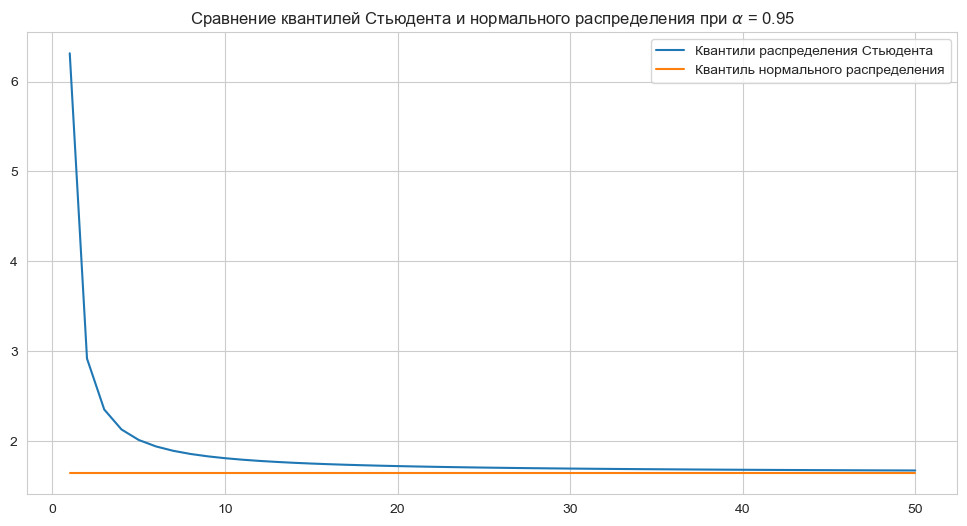

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(1, 50, 50), deg, label='Квантили распределения Стьюдента')
plt.plot(np.linspace(1, 50, 50), np.full(shape=50, fill_value = sps.norm.ppf(0.95)), label='Квантиль нормального распределения')
plt.title(r'Сравнение квантилей Стьюдента и нормального распределения при $\alpha$ = 0.95')
plt.legend()

Как изменяется поведение значения квантилей t распределения, есть ли у него какой-то предел?

**Ответ:** квантили стремятся к квантилю нормального распределения при увеличении количества степеней свобод. Квантиль нормального распределения является минимальным значением.

### ДИ в нормальной модели
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимптотический доверительный интервал при помощи центральной предельной теоремы;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.


Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: 

Точный доверительный интервал: 



Постройте доверительные интервалы для параметра сдвига стандартного нормального распределения. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

*Указание*: рассмотрите длину выборки около 20-30.


In [155]:
sample_size = 30
sample = np.random.normal(size=sample_size)  # выборка
q_n = sps.norm(loc=0, scale=1).ppf(0.95)
q_t = sps.t(loc=0, scale=1, df=(sample_size - 1)).ppf(0.95)

asymptotic_ci_min = (np.mean(sample) - (q_n * 2/np.sqrt(sample_size))) # асимптотические ДИ
asymptotic_ci_plus = (np.mean(sample) + (q_n * 2/np.sqrt(sample_size)))

precise_ci_min = (np.mean(sample) - (q_t * 2/np.sqrt(sample_size)))  # точные ДИ
precise_ci_plus = (np.mean(sample) + (q_t * 2/np.sqrt(sample_size)))
print(asymptotic_ci_min, asymptotic_ci_plus)
print(precise_ci_min, precise_ci_plus)

-0.8087179715266775 0.3925132755073341
-0.8285358150090552 0.4123311189897118


Сравните полученные значения для доверительных интервалов.

**Ответ**: Значения оказались почти одинаковыми.

Реализуйте функции построения этих интервалов по выборке. Функции уже задокументированы.

Интервалы считайте по префиксам. Циклы использовать **запрещено**. Для подсчета среднего по префиксам используйте функцию `np.cumsum`.

In [156]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления асимптотического доверительного интервала
        параметра сдвига для всех подвыборок выборки
    param sample: выборка,
    param alpha: уровень доверия

    return: асимптотический доверительный интервал
    '''

    left =  np.cumsum(np.mean(sample))/np.arange(1, 31) - sps.norm(loc=0, scale=1).ppf(alpha)*2/np.sqrt(np.arange(1, 31))
    right =  np.cumsum(np.mean(sample))/np.arange(1, 31) + sps.norm(loc=0, scale=1).ppf(alpha)*2/np.sqrt(np.arange(1, 31))
    return (left, right)



def calculate_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления неасимптотического доверительного интервала
        параметра сдвига для всех подвыборок выборки
    param sample: выборка,
    param alpha: уровень доверия

    return: неасимптотический доверительный интервал
    '''
    k =  np.cumsum(sample)
    left = k/np.arange(1, 31)-(sps.t(loc=0, scale=1, df = sample_size-1).ppf(alpha))*2/np.sqrt(np.arange(1, 31)) 
    right = k/np.arange(1, 31)+(sps.t(loc=0, scale=1, df = sample_size-1).ppf(alpha))*2/np.sqrt(np.arange(1, 31))

    return (left, right)

In [157]:
calculate_asymptotic_confidence_intervals(sample), calculate_confidence_intervals(sample)

((array([-3.4978096 , -2.43022548, -1.96868082, -1.69687921, -1.51282228,
         -1.37770109, -1.27312138, -1.18909995, -1.11969157, -1.06110701,
         -1.01080245, -0.96699855, -0.9284085 , -0.8940757 , -0.86327225,
         -0.83543321, -0.81011252, -0.78695268, -0.76566336, -0.74600602,
         -0.72778261, -0.71082714, -0.69499931, -0.68017961, -0.66626554,
         -0.65316861, -0.64081195, -0.62912846, -0.61805924, -0.60755237]),
  array([3.08160491, 2.22212313, 1.82994592, 1.59282804, 1.42958134,
         1.30833364, 1.21366356, 1.13707436, 1.0734466 , 1.01948654,
         0.97296566, 0.93231482, 0.89639276, 0.86434679, 0.83552527,
         0.80942042, 0.78562989, 0.76383019, 0.74375785, 0.72519579,
         0.70796334, 0.69190875, 0.67690345, 0.66283775, 0.64961736,
         0.63716074, 0.62539696, 0.61426401, 0.60370736, 0.59367888])),
 (array([-5.18765233, -4.06100918, -3.22519021, -2.65217807, -2.60177602,
         -2.2100866 , -2.06861881, -2.0702577 , -1.86524789, -1

Сгенерируйте выборку из нормального распределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассмотрите длину выборки около 20-30.

Чтобы не плодить код, допишите следующую функцию (см. ниже). При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

*Подсказка:* вам может пригодиться функция `plt.fill_between`.


In [158]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None,
    ylim=(-10, 10), color_estimation='#FF3300', color_interval='#00CC66',
    color_sample='#0066FF', label_estimation='Оценка',
    sample_label='Семпл', interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.

    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    '''

    time = np.arange(len(left)) + 1

    assert len(time) == len(right)

    plt.plot(time, left, label='left ' + label_estimation)
    
    assert len(time) == len(right)
    
    plt.plot(time, right, label='right ' + label_estimation)
    
    plt.legend(fontsize=16)
    plt.ylim(ylim)
    plt.xlabel('Размер выборки')
    plt.title('Зависимость значений \
доверительного интервала от размера выборки')
    plt.grid()

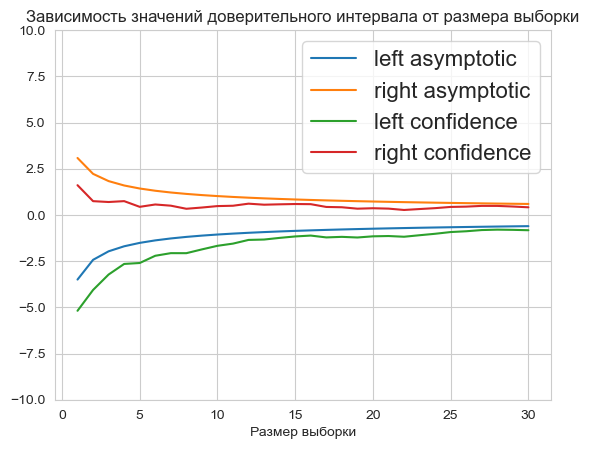

In [159]:
draw_confidence_interval(
    calculate_asymptotic_confidence_intervals(sample, alpha=0.95)[0], calculate_asymptotic_confidence_intervals(sample, alpha=0.95)[1], estimation=None, sample=None,
    ylim=(-10, 10), color_estimation='#FF3300', color_interval='#00CC66',
    color_sample='#0066FF', label_estimation='asymptotic',
    sample_label='', interval_label=None
)

draw_confidence_interval(
    calculate_confidence_intervals(sample, alpha=0.95)[0], calculate_confidence_intervals(sample, alpha=0.95)[1], estimation=None, sample=None,
    ylim=(-10, 10), color_estimation='#FF3300', color_interval='#00CC66',
    color_sample='#0066FF', label_estimation='confidence',
    sample_label='', interval_label=None
)

**Вывод:** при увеличении количества степеней свободы квантиль для распределения Стюарта приближается к квантилю нормального распределения, поэтому прибольших степенях свободы графики практически совпадают

## Задача 2
### Функция правдоподобия
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [160]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.

    Аргументы:
    density_function --- функция, считающая плотность (обычную или дискретную).
        На вход данная функция должна принимать массив размера (1, len_sample)
        и возвращать массив размера (len_grid, len_sample).
    grid --- массив размера (len_grid, 1) --- сетка для построения графика;
    samples --- три выборки;
    label --- latex-код параметрической модели.
    """
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

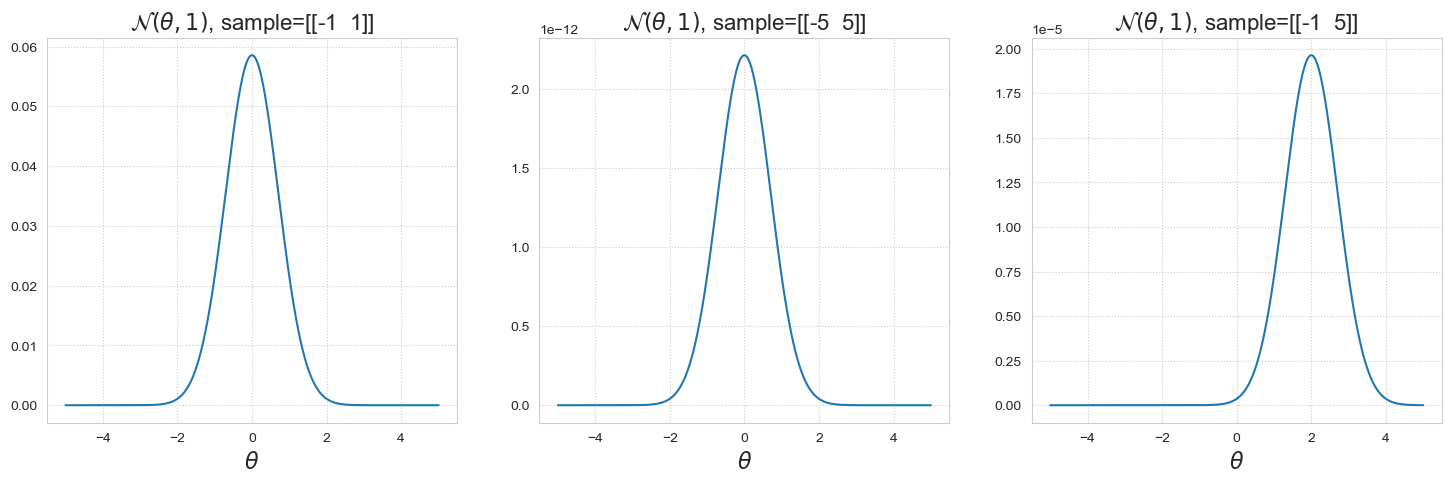

In [161]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid,
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

In [162]:
# ваш код

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

*Примечание:* В выводе для каждой модели требуется описать, как меняются значения функции (сдвиг, масштаб, форма) при изменении выборки, где достигается максимум, а также какие значения параметра более правдоподобны для данной выборки, какие — менее.

**Вывод:**

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [163]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**


In [164]:
# ваш код